In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import os
import shutil

Using TensorFlow backend.


In [2]:
df = pd.read_csv("./datasets/mrfg3.csv")

In [3]:
df.pop("Date")

0       6/29/2007 16:56:00
1        7/2/2007 16:56:00
2        7/3/2007 16:56:00
3        7/4/2007 16:56:00
4        7/5/2007 16:56:00
               ...        
2715    1/10/2019 16:56:00
2716    1/11/2019 16:56:00
2717    1/14/2019 16:56:00
2718    1/15/2019 16:56:00
2719    1/16/2019 16:56:00
Name: Date, Length: 2720, dtype: object

In [4]:
df["Volume"] = (df["Volume"] - df["Volume"].mean()) / df["Volume"].std()

In [5]:
df.head()

Open   High    Low  Close    Volume
0  17.05  18.40  17.05  18.00  0.942161
1  18.29  19.98  17.81  19.30 -0.305835
2  19.55  19.56  18.34  18.85 -0.715405
3  18.51  18.99  18.42  18.42 -0.907154
4  18.50  19.30  18.50  19.20 -0.526246

In [6]:
def generate(X, Y, steps):
    x, y = [], []
    for i in range(0, len(X)):
        end_index = i+steps
        if end_index > len(X)-1:
            break
        else:
            x.append(X[i:end_index])
            y.append(Y[end_index])
    return x, y

In [7]:
def categorical_y(Y):
    y = [0]
    for i, _ in enumerate(Y[1:]):
        if Y[i] > Y[i-1]:
            y.append(1)
        else:
            y.append(0)
    return y

In [8]:
#function for managing models version
def confirm_model_version():
    model_version = input("Insert Model Version\n")
    if input("Confirm Model Version '%s'" % model_version) == "y":
        if model_version not in os.listdir("./models/"):
            os.mkdir("./models/%s" % model_version)
        return model_version
    else:
        confirm_model_version()

In [9]:
features = df.columns
# features = features.drop("Close")
label = df.columns[3]

In [10]:
x = np.array(df[features])
y = np.array(df[label])

In [11]:
x, y = generate(x, y, 5)
y = categorical_y(y)
x, y = np.asarray(x), np.asarray(y)
x = x.reshape(x.shape[0], x.shape[1], len(features))
y = to_categorical(y)

In [12]:
model_version = confirm_model_version()

Insert Model Version
categorical_3
Confirm Model Version 'categorical_3'y


In [13]:
checkpoint = ModelCheckpoint("./models/%s/weights.h5" % model_version, monitor="val_acc", save_best_only=True, verbose=1)

In [14]:
model = models.Sequential()
model.add(layers.LSTM(10, activation="relu", input_shape=(x.shape[1], x.shape[2])))
model.add(layers.Dense(2, activation="softmax"))

In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(x, y, epochs=1000, batch_size=64, validation_split=.3, callbacks=[checkpoint])

Train on 1900 samples, validate on 815 samples
Epoch 1/1000
1900/1900 [==============================] - 1s 508us/step - loss: 0.8171 - acc: 0.4689 - val_loss: 0.6836 - val_acc: 0.5693

Epoch 00001: val_acc improved from -inf to 0.56933, saving model to ./models/categorical_3/weights.h5
Epoch 2/1000
1900/1900 [==============================] - 0s 106us/step - loss: 0.6874 - acc: 0.5463 - val_loss: 0.6795 - val_acc: 0.5656

Epoch 00002: val_acc did not improve
Epoch 3/1000
1900/1900 [==============================] - 0s 86us/step - loss: 0.6850 - acc: 0.5553 - val_loss: 0.6798 - val_acc: 0.5669

Epoch 00003: val_acc did not improve
Epoch 4/1000
1900/1900 [==============================] - 0s 85us/step - loss: 0.6827 - acc: 0.5542 - val_loss: 0.6804 - val_acc: 0.5693

Epoch 00004: val_acc did not improve
Epoch 5/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.6812 - acc: 0.5700 - val_loss: 0.6781 - val_acc: 0.5693

Epoch 00005: val_acc did not improve
Epoch 6/100

1900/1900 [==============================] - 0s 87us/step - loss: 0.5225 - acc: 0.7416 - val_loss: 0.5776 - val_acc: 0.7190

Epoch 00044: val_acc did not improve
Epoch 45/1000
1900/1900 [==============================] - 0s 85us/step - loss: 0.4892 - acc: 0.8021 - val_loss: 0.5738 - val_acc: 0.7877

Epoch 00045: val_acc did not improve
Epoch 46/1000
1900/1900 [==============================] - 0s 85us/step - loss: 0.4713 - acc: 0.8100 - val_loss: 0.5815 - val_acc: 0.7620

Epoch 00046: val_acc did not improve
Epoch 47/1000
1900/1900 [==============================] - 0s 106us/step - loss: 0.4542 - acc: 0.8374 - val_loss: 0.5727 - val_acc: 0.7202

Epoch 00047: val_acc did not improve
Epoch 48/1000
1900/1900 [==============================] - 0s 91us/step - loss: 0.4524 - acc: 0.8326 - val_loss: 0.5713 - val_acc: 0.8000

Epoch 00048: val_acc did not improve
Epoch 49/1000
1900/1900 [==============================] - 0s 84us/step - loss: 0.4430 - acc: 0.8316 - val_loss: 0.5667 - val_acc: 0.

1900/1900 [==============================] - 0s 100us/step - loss: 0.3731 - acc: 0.8663 - val_loss: 0.5129 - val_acc: 0.8491

Epoch 00089: val_acc did not improve
Epoch 90/1000
1900/1900 [==============================] - 0s 91us/step - loss: 0.3474 - acc: 0.8879 - val_loss: 0.4963 - val_acc: 0.8270

Epoch 00090: val_acc did not improve
Epoch 91/1000
1900/1900 [==============================] - 0s 89us/step - loss: 0.3523 - acc: 0.8679 - val_loss: 0.4920 - val_acc: 0.8393

Epoch 00091: val_acc did not improve
Epoch 92/1000
1900/1900 [==============================] - 0s 106us/step - loss: 0.3507 - acc: 0.8737 - val_loss: 0.4931 - val_acc: 0.8491

Epoch 00092: val_acc did not improve
Epoch 93/1000
1900/1900 [==============================] - 0s 85us/step - loss: 0.3564 - acc: 0.8689 - val_loss: 0.4925 - val_acc: 0.7853

Epoch 00093: val_acc did not improve
Epoch 94/1000
1900/1900 [==============================] - 0s 86us/step - loss: 0.3517 - acc: 0.8621 - val_loss: 0.5315 - val_acc: 0

1900/1900 [==============================] - 0s 92us/step - loss: 0.3047 - acc: 0.8853 - val_loss: 0.4254 - val_acc: 0.8147

Epoch 00133: val_acc did not improve
Epoch 134/1000
1900/1900 [==============================] - 0s 101us/step - loss: 0.3322 - acc: 0.8663 - val_loss: 0.4238 - val_acc: 0.8785

Epoch 00134: val_acc did not improve
Epoch 135/1000
1900/1900 [==============================] - 0s 84us/step - loss: 0.2927 - acc: 0.9074 - val_loss: 0.4196 - val_acc: 0.8982

Epoch 00135: val_acc improved from 0.88712 to 0.89816, saving model to ./models/categorical_3/weights.h5
Epoch 136/1000
1900/1900 [==============================] - 0s 88us/step - loss: 0.2923 - acc: 0.9016 - val_loss: 0.4360 - val_acc: 0.8724

Epoch 00136: val_acc did not improve
Epoch 137/1000
1900/1900 [==============================] - 0s 89us/step - loss: 0.2937 - acc: 0.8905 - val_loss: 0.4378 - val_acc: 0.8822

Epoch 00137: val_acc did not improve
Epoch 138/1000
1900/1900 [==============================] - 0

1900/1900 [==============================] - 0s 85us/step - loss: 0.2570 - acc: 0.9132 - val_loss: 0.3763 - val_acc: 0.8748

Epoch 00178: val_acc did not improve
Epoch 179/1000
1900/1900 [==============================] - 0s 86us/step - loss: 0.2801 - acc: 0.9037 - val_loss: 0.3607 - val_acc: 0.8969

Epoch 00179: val_acc did not improve
Epoch 180/1000
1900/1900 [==============================] - 0s 87us/step - loss: 0.2505 - acc: 0.9053 - val_loss: 0.3924 - val_acc: 0.8626

Epoch 00180: val_acc did not improve
Epoch 181/1000
1900/1900 [==============================] - 0s 85us/step - loss: 0.2742 - acc: 0.8974 - val_loss: 0.4095 - val_acc: 0.8233

Epoch 00181: val_acc did not improve
Epoch 182/1000
1900/1900 [==============================] - 0s 86us/step - loss: 0.2445 - acc: 0.9184 - val_loss: 0.3677 - val_acc: 0.9055

Epoch 00182: val_acc did not improve
Epoch 183/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.2418 - acc: 0.9153 - val_loss: 0.3580 - val_acc

1900/1900 [==============================] - 0s 99us/step - loss: 0.2519 - acc: 0.8947 - val_loss: 0.3264 - val_acc: 0.9141

Epoch 00223: val_acc did not improve
Epoch 224/1000
1900/1900 [==============================] - 0s 126us/step - loss: 0.2571 - acc: 0.9053 - val_loss: 0.3251 - val_acc: 0.9117

Epoch 00224: val_acc did not improve
Epoch 225/1000
1900/1900 [==============================] - 0s 140us/step - loss: 0.2305 - acc: 0.9195 - val_loss: 0.3350 - val_acc: 0.9055

Epoch 00225: val_acc did not improve
Epoch 226/1000
1900/1900 [==============================] - 0s 124us/step - loss: 0.2261 - acc: 0.9247 - val_loss: 0.3223 - val_acc: 0.9141

Epoch 00226: val_acc did not improve
Epoch 227/1000
1900/1900 [==============================] - 0s 109us/step - loss: 0.2158 - acc: 0.9274 - val_loss: 0.3421 - val_acc: 0.8834

Epoch 00227: val_acc did not improve
Epoch 228/1000
1900/1900 [==============================] - 0s 103us/step - loss: 0.2298 - acc: 0.9195 - val_loss: 0.3197 - va

1900/1900 [==============================] - 0s 96us/step - loss: 0.2178 - acc: 0.9126 - val_loss: 0.2934 - val_acc: 0.9190

Epoch 00269: val_acc did not improve
Epoch 270/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.2150 - acc: 0.9284 - val_loss: 0.2912 - val_acc: 0.9153

Epoch 00270: val_acc did not improve
Epoch 271/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.2106 - acc: 0.9226 - val_loss: 0.3201 - val_acc: 0.8871

Epoch 00271: val_acc did not improve
Epoch 272/1000
1900/1900 [==============================] - 0s 97us/step - loss: 0.2293 - acc: 0.9084 - val_loss: 0.3298 - val_acc: 0.8626

Epoch 00272: val_acc did not improve
Epoch 273/1000
1900/1900 [==============================] - 0s 101us/step - loss: 0.1973 - acc: 0.9363 - val_loss: 0.2862 - val_acc: 0.9031

Epoch 00273: val_acc did not improve
Epoch 274/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.2270 - acc: 0.9132 - val_loss: 0.2864 - val_ac


Epoch 00314: val_acc did not improve
Epoch 315/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1963 - acc: 0.9216 - val_loss: 0.2888 - val_acc: 0.8945

Epoch 00315: val_acc did not improve
Epoch 316/1000
1900/1900 [==============================] - 0s 97us/step - loss: 0.1981 - acc: 0.9295 - val_loss: 0.2711 - val_acc: 0.9166

Epoch 00316: val_acc did not improve
Epoch 317/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.2123 - acc: 0.9105 - val_loss: 0.2866 - val_acc: 0.9018

Epoch 00317: val_acc did not improve
Epoch 318/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.2156 - acc: 0.9158 - val_loss: 0.2860 - val_acc: 0.9043

Epoch 00318: val_acc did not improve
Epoch 319/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1829 - acc: 0.9384 - val_loss: 0.2788 - val_acc: 0.9080

Epoch 00319: val_acc did not improve
Epoch 320/1000
1900/1900 [==============================] - 0s 102us/step - l


Epoch 00360: val_acc did not improve
Epoch 361/1000
1900/1900 [==============================] - 0s 99us/step - loss: 0.1996 - acc: 0.9226 - val_loss: 0.3147 - val_acc: 0.8479

Epoch 00361: val_acc did not improve
Epoch 362/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1824 - acc: 0.9358 - val_loss: 0.2592 - val_acc: 0.8982

Epoch 00362: val_acc did not improve
Epoch 363/1000
1900/1900 [==============================] - 0s 98us/step - loss: 0.1636 - acc: 0.9442 - val_loss: 0.2457 - val_acc: 0.9239

Epoch 00363: val_acc did not improve
Epoch 364/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1673 - acc: 0.9368 - val_loss: 0.2479 - val_acc: 0.9067

Epoch 00364: val_acc did not improve
Epoch 365/1000
1900/1900 [==============================] - 0s 99us/step - loss: 0.1715 - acc: 0.9447 - val_loss: 0.2501 - val_acc: 0.9202

Epoch 00365: val_acc did not improve
Epoch 366/1000
1900/1900 [==============================] - 0s 95us/step - lo

1900/1900 [==============================] - 0s 93us/step - loss: 0.1558 - acc: 0.9500 - val_loss: 0.2416 - val_acc: 0.9055

Epoch 00407: val_acc did not improve
Epoch 408/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1682 - acc: 0.9400 - val_loss: 0.2463 - val_acc: 0.9104

Epoch 00408: val_acc did not improve
Epoch 409/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1750 - acc: 0.9358 - val_loss: 0.2451 - val_acc: 0.9104

Epoch 00409: val_acc did not improve
Epoch 410/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1905 - acc: 0.9205 - val_loss: 0.2534 - val_acc: 0.9117

Epoch 00410: val_acc did not improve
Epoch 411/1000
1900/1900 [==============================] - 0s 92us/step - loss: 0.1723 - acc: 0.9453 - val_loss: 0.2298 - val_acc: 0.9141

Epoch 00411: val_acc did not improve
Epoch 412/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1605 - acc: 0.9442 - val_loss: 0.2325 - val_acc

1900/1900 [==============================] - 0s 95us/step - loss: 0.1809 - acc: 0.9300 - val_loss: 0.2331 - val_acc: 0.9215

Epoch 00453: val_acc did not improve
Epoch 454/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1415 - acc: 0.9568 - val_loss: 0.2200 - val_acc: 0.9350

Epoch 00454: val_acc did not improve
Epoch 455/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1507 - acc: 0.9521 - val_loss: 0.2347 - val_acc: 0.8982

Epoch 00455: val_acc did not improve
Epoch 456/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1599 - acc: 0.9411 - val_loss: 0.2263 - val_acc: 0.9227

Epoch 00456: val_acc did not improve
Epoch 457/1000
1900/1900 [==============================] - 0s 99us/step - loss: 0.1735 - acc: 0.9411 - val_loss: 0.3482 - val_acc: 0.8282

Epoch 00457: val_acc did not improve
Epoch 458/1000
1900/1900 [==============================] - 0s 104us/step - loss: 0.1949 - acc: 0.9232 - val_loss: 0.3146 - val_ac

1900/1900 [==============================] - 0s 93us/step - loss: 0.1497 - acc: 0.9479 - val_loss: 0.2143 - val_acc: 0.9264

Epoch 00498: val_acc did not improve
Epoch 499/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1596 - acc: 0.9400 - val_loss: 0.2189 - val_acc: 0.9325

Epoch 00499: val_acc did not improve
Epoch 500/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1883 - acc: 0.9300 - val_loss: 0.3154 - val_acc: 0.8294

Epoch 00500: val_acc did not improve
Epoch 501/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1537 - acc: 0.9400 - val_loss: 0.2094 - val_acc: 0.9362

Epoch 00501: val_acc did not improve
Epoch 502/1000
1900/1900 [==============================] - 0s 97us/step - loss: 0.1574 - acc: 0.9358 - val_loss: 0.2211 - val_acc: 0.9104

Epoch 00502: val_acc did not improve
Epoch 503/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1614 - acc: 0.9379 - val_loss: 0.4190 - val_acc

1900/1900 [==============================] - 0s 100us/step - loss: 0.1498 - acc: 0.9474 - val_loss: 0.2079 - val_acc: 0.9276

Epoch 00544: val_acc did not improve
Epoch 545/1000
1900/1900 [==============================] - 0s 92us/step - loss: 0.1767 - acc: 0.9300 - val_loss: 0.4753 - val_acc: 0.7399

Epoch 00545: val_acc did not improve
Epoch 546/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1645 - acc: 0.9468 - val_loss: 0.2226 - val_acc: 0.9166

Epoch 00546: val_acc did not improve
Epoch 547/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1336 - acc: 0.9558 - val_loss: 0.2065 - val_acc: 0.9301

Epoch 00547: val_acc did not improve
Epoch 548/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1377 - acc: 0.9505 - val_loss: 0.2219 - val_acc: 0.9129

Epoch 00548: val_acc did not improve
Epoch 549/1000
1900/1900 [==============================] - 0s 92us/step - loss: 0.1394 - acc: 0.9537 - val_loss: 0.2623 - val_ac

1900/1900 [==============================] - 0s 99us/step - loss: 0.1516 - acc: 0.9421 - val_loss: 0.2084 - val_acc: 0.9276

Epoch 00590: val_acc did not improve
Epoch 591/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1319 - acc: 0.9616 - val_loss: 0.2011 - val_acc: 0.9387

Epoch 00591: val_acc did not improve
Epoch 592/1000
1900/1900 [==============================] - 0s 120us/step - loss: 0.1357 - acc: 0.9547 - val_loss: 0.2318 - val_acc: 0.9043

Epoch 00592: val_acc did not improve
Epoch 593/1000
1900/1900 [==============================] - 0s 106us/step - loss: 0.1414 - acc: 0.9495 - val_loss: 0.1982 - val_acc: 0.9362

Epoch 00593: val_acc did not improve
Epoch 594/1000
1900/1900 [==============================] - 0s 102us/step - loss: 0.1400 - acc: 0.9500 - val_loss: 0.2133 - val_acc: 0.9227

Epoch 00594: val_acc did not improve
Epoch 595/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1352 - acc: 0.9558 - val_loss: 0.2014 - val_

1900/1900 [==============================] - 0s 94us/step - loss: 0.1446 - acc: 0.9432 - val_loss: 0.2317 - val_acc: 0.9067

Epoch 00636: val_acc did not improve
Epoch 637/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1397 - acc: 0.9495 - val_loss: 0.2187 - val_acc: 0.9129

Epoch 00637: val_acc did not improve
Epoch 638/1000
1900/1900 [==============================] - 0s 98us/step - loss: 0.1430 - acc: 0.9479 - val_loss: 0.2022 - val_acc: 0.9374

Epoch 00638: val_acc did not improve
Epoch 639/1000
1900/1900 [==============================] - 0s 92us/step - loss: 0.1387 - acc: 0.9553 - val_loss: 0.2000 - val_acc: 0.9337

Epoch 00639: val_acc did not improve
Epoch 640/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1404 - acc: 0.9442 - val_loss: 0.2031 - val_acc: 0.9264

Epoch 00640: val_acc did not improve
Epoch 641/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1416 - acc: 0.9489 - val_loss: 0.1990 - val_acc

1900/1900 [==============================] - 0s 96us/step - loss: 0.1209 - acc: 0.9663 - val_loss: 0.1959 - val_acc: 0.9252

Epoch 00682: val_acc did not improve
Epoch 683/1000
1900/1900 [==============================] - 0s 97us/step - loss: 0.1240 - acc: 0.9616 - val_loss: 0.1909 - val_acc: 0.9350

Epoch 00683: val_acc did not improve
Epoch 684/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1705 - acc: 0.9305 - val_loss: 0.2695 - val_acc: 0.8638

Epoch 00684: val_acc did not improve
Epoch 685/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1600 - acc: 0.9342 - val_loss: 0.4256 - val_acc: 0.7939

Epoch 00685: val_acc did not improve
Epoch 686/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1426 - acc: 0.9500 - val_loss: 0.2005 - val_acc: 0.9337

Epoch 00686: val_acc did not improve
Epoch 687/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1324 - acc: 0.9532 - val_loss: 0.2311 - val_acc

1900/1900 [==============================] - 0s 99us/step - loss: 0.1305 - acc: 0.9532 - val_loss: 0.2014 - val_acc: 0.9080

Epoch 00728: val_acc did not improve
Epoch 729/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1352 - acc: 0.9447 - val_loss: 0.2179 - val_acc: 0.9043

Epoch 00729: val_acc did not improve
Epoch 730/1000
1900/1900 [==============================] - 0s 97us/step - loss: 0.1550 - acc: 0.9437 - val_loss: 0.2384 - val_acc: 0.8883

Epoch 00730: val_acc did not improve
Epoch 731/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1260 - acc: 0.9595 - val_loss: 0.1967 - val_acc: 0.9350

Epoch 00731: val_acc did not improve
Epoch 732/1000
1900/1900 [==============================] - 0s 99us/step - loss: 0.1543 - acc: 0.9458 - val_loss: 0.2338 - val_acc: 0.8883

Epoch 00732: val_acc did not improve
Epoch 733/1000
1900/1900 [==============================] - 0s 100us/step - loss: 0.1412 - acc: 0.9495 - val_loss: 0.1916 - val_ac


Epoch 00773: val_acc did not improve
Epoch 774/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1259 - acc: 0.9547 - val_loss: 0.2297 - val_acc: 0.8969

Epoch 00774: val_acc did not improve
Epoch 775/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1688 - acc: 0.9374 - val_loss: 0.1990 - val_acc: 0.9337

Epoch 00775: val_acc did not improve
Epoch 776/1000
1900/1900 [==============================] - 0s 98us/step - loss: 0.1257 - acc: 0.9568 - val_loss: 0.2207 - val_acc: 0.9067

Epoch 00776: val_acc did not improve
Epoch 777/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1296 - acc: 0.9447 - val_loss: 0.3418 - val_acc: 0.8356

Epoch 00777: val_acc did not improve
Epoch 778/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1328 - acc: 0.9537 - val_loss: 0.1940 - val_acc: 0.9166

Epoch 00778: val_acc did not improve
Epoch 779/1000
1900/1900 [==============================] - 0s 97us/step - lo

1900/1900 [==============================] - 0s 94us/step - loss: 0.1412 - acc: 0.9453 - val_loss: 0.2628 - val_acc: 0.8626

Epoch 00820: val_acc did not improve
Epoch 821/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1244 - acc: 0.9563 - val_loss: 0.2082 - val_acc: 0.9043

Epoch 00821: val_acc did not improve
Epoch 822/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1160 - acc: 0.9605 - val_loss: 0.1859 - val_acc: 0.9313

Epoch 00822: val_acc did not improve
Epoch 823/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1463 - acc: 0.9400 - val_loss: 0.1941 - val_acc: 0.9190

Epoch 00823: val_acc did not improve
Epoch 824/1000
1900/1900 [==============================] - 0s 92us/step - loss: 0.1301 - acc: 0.9516 - val_loss: 0.2020 - val_acc: 0.9129

Epoch 00824: val_acc did not improve
Epoch 825/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1586 - acc: 0.9368 - val_loss: 0.2069 - val_acc

1900/1900 [==============================] - 0s 94us/step - loss: 0.1316 - acc: 0.9437 - val_loss: 0.2015 - val_acc: 0.9129

Epoch 00866: val_acc did not improve
Epoch 867/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1297 - acc: 0.9505 - val_loss: 0.1846 - val_acc: 0.9264

Epoch 00867: val_acc did not improve
Epoch 868/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1208 - acc: 0.9526 - val_loss: 0.2088 - val_acc: 0.9202

Epoch 00868: val_acc did not improve
Epoch 869/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1374 - acc: 0.9521 - val_loss: 0.1773 - val_acc: 0.9399

Epoch 00869: val_acc did not improve
Epoch 870/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1244 - acc: 0.9579 - val_loss: 0.2113 - val_acc: 0.9178

Epoch 00870: val_acc did not improve
Epoch 871/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1177 - acc: 0.9558 - val_loss: 0.1836 - val_acc

1900/1900 [==============================] - ETA: 0s - loss: 0.1089 - acc: 0.964 - 0s 106us/step - loss: 0.1083 - acc: 0.9647 - val_loss: 0.1859 - val_acc: 0.9411

Epoch 00912: val_acc did not improve
Epoch 913/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1160 - acc: 0.9584 - val_loss: 0.3358 - val_acc: 0.8356

Epoch 00913: val_acc did not improve
Epoch 914/1000
1900/1900 [==============================] - 0s 97us/step - loss: 0.1234 - acc: 0.9521 - val_loss: 0.2154 - val_acc: 0.8994

Epoch 00914: val_acc did not improve
Epoch 915/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1363 - acc: 0.9479 - val_loss: 0.2054 - val_acc: 0.9202

Epoch 00915: val_acc did not improve
Epoch 916/1000
1900/1900 [==============================] - 0s 94us/step - loss: 0.1382 - acc: 0.9489 - val_loss: 0.1696 - val_acc: 0.9448

Epoch 00916: val_acc did not improve
Epoch 917/1000
1900/1900 [==============================] - 0s 93us/step - loss: 0.1360 - a


Epoch 00957: val_acc did not improve
Epoch 958/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1008 - acc: 0.9711 - val_loss: 0.1717 - val_acc: 0.9362

Epoch 00958: val_acc did not improve
Epoch 959/1000
1900/1900 [==============================] - 0s 96us/step - loss: 0.1002 - acc: 0.9695 - val_loss: 0.1798 - val_acc: 0.9288

Epoch 00959: val_acc did not improve
Epoch 960/1000
1900/1900 [==============================] - 0s 97us/step - loss: 0.1360 - acc: 0.9453 - val_loss: 0.2068 - val_acc: 0.9080

Epoch 00960: val_acc did not improve
Epoch 961/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1225 - acc: 0.9479 - val_loss: 0.1835 - val_acc: 0.9166

Epoch 00961: val_acc did not improve
Epoch 962/1000
1900/1900 [==============================] - 0s 95us/step - loss: 0.1230 - acc: 0.9521 - val_loss: 0.2058 - val_acc: 0.8994

Epoch 00962: val_acc did not improve
Epoch 963/1000
1900/1900 [==============================] - 0s 95us/step - lo

In [17]:
model.load_weights("./models/%s/weights.h5" % model_version)
model.save("models/%s/model.h5" % model_version)

In [18]:
val_history = pd.DataFrame.from_dict(history.history)

In [19]:
epochs = [i for i in range(0, len(val_history))]
highest_val_acc = val_history["val_acc"].max()
index_highest_val_acc = val_history[val_history["val_acc"] == highest_val_acc].index[0]

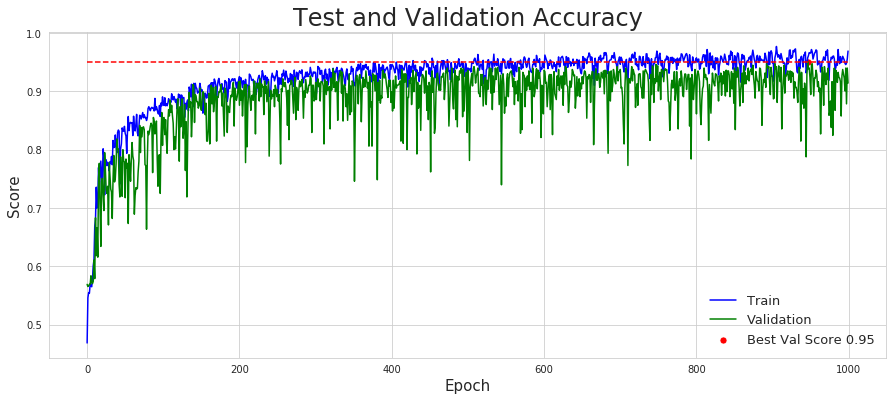

In [23]:
plt.figure(figsize=(15, 6))

sns.set_style("whitegrid")

sns.lineplot(data=val_history, x=epochs, y="acc", color="b", label="Train")
sns.lineplot(data=val_history, x=epochs, y="val_acc", color="g", label="Validation")

sns.scatterplot(x=[index_highest_val_acc], y=highest_val_acc , color="red", s=50, label="Best Val Score %.2f" % highest_val_acc)
plt.plot(epochs, [highest_val_acc for i in epochs], "--", color="red")

plt.title("Test and Validation Accuracy", fontsize=24)
plt.ylabel("Score", fontsize=15)
plt.xlabel("Epoch", fontsize=15)
plt.legend(loc="lower right", frameon=False, fontsize=13)

plt.savefig("./models/%s/test_and_validation_accuracy.png" % model_version)

plt.show()

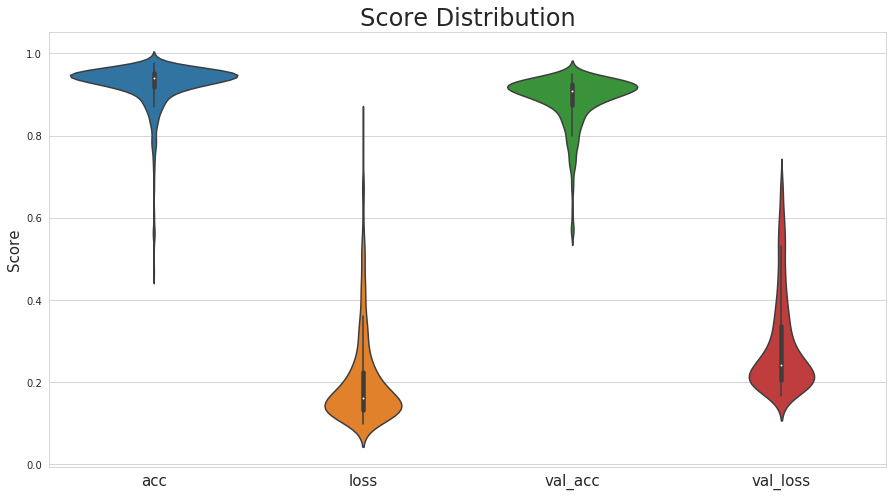

In [21]:
plt.figure(figsize=(15, 8))

sns.violinplot(data=val_history)

plt.title("Score Distribution", fontsize=24)
plt.ylabel("Score", fontsize=15)
plt.xticks(fontsize=15)

plt.savefig("./models/%s/score_distribution.png" % model_version)

plt.show()